### Preprocessing -> Use wavelet transform as a feature for training MOdel

Wavelet Transform 

In [201]:
import numpy as np 
import pywt 
import cv2
from matplotlib import pyplot as plt

In [202]:
def w2d(img , mode ='haar', level = 1):
    imArray = img
    # DataType Conversion 
    # Convert to gray-scale 
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # TO float -> more depth image
    imArray = np.float32(imArray)
    imArray  = imArray/255;
    
    #Compute coeff -> 
    coeff = pywt.wavedec2(imArray, mode , level=level)
    
    #Processing coefficient 
    coeffs_H=list(coeff)
    coeffs_H[0] *= 0;
    
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    
    return imArray_H


In [203]:
image = cv2.imread('./datasets/sunny/sunny10.png')

[ WARN:0@4545.891] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./datasets/sunny/sunny10.png'): can't open/read file: check file path/integrity


In [204]:
im_harr = w2d(image,'db1',5)


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


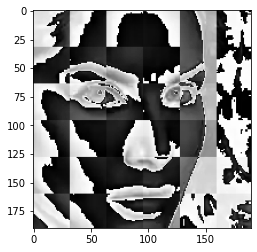

In [205]:
# gray to see in black and white 
plt.imshow(im_harr , cmap='gray')

Collecting Dict again

In [206]:
cropped_data_path= './datasets/cropped/'

In [207]:
import os
img_directory = []
for entry in os.scandir(cropped_data_path):
    if entry.is_dir():
        img_directory.append(entry.path)
img_directory

['./datasets/cropped/barack',
 './datasets/cropped/robert',
 './datasets/cropped/tamana',
 './datasets/cropped/messi ']

In [208]:
cropped_img_dirs =[]
person_file_name_dict ={}

#
for img_dir in img_directory:
    count= 1
    persons_name = img_dir.split('/')[-1]
    print(persons_name)
    #initialisation each dict
    person_file_name_dict[persons_name]=[]
    
    # main function 
    for entry in os.scandir(img_dir):
            cropped_folder = cropped_data_path + persons_name
      
                
            cropped_file_name_temp = persons_name + str(count) +".png"
            cropped_file_path_name_temp = cropped_folder+"/"+cropped_file_name_temp
            
            #writting 
            
            person_file_name_dict[persons_name].append(cropped_file_path_name_temp)
            count = count +1

barack
robert
tamana
messi 


In [209]:

# count =0 
# for v in person_file_name_dict['Disha']:
#     print(v)
#     count =count+1
# print(count)


In [210]:
person_file_name_dict


{'barack': ['./datasets/cropped/barack/barack1.png',
  './datasets/cropped/barack/barack2.png',
  './datasets/cropped/barack/barack3.png',
  './datasets/cropped/barack/barack4.png',
  './datasets/cropped/barack/barack5.png',
  './datasets/cropped/barack/barack6.png',
  './datasets/cropped/barack/barack7.png',
  './datasets/cropped/barack/barack8.png',
  './datasets/cropped/barack/barack9.png',
  './datasets/cropped/barack/barack10.png',
  './datasets/cropped/barack/barack11.png',
  './datasets/cropped/barack/barack12.png',
  './datasets/cropped/barack/barack13.png',
  './datasets/cropped/barack/barack14.png',
  './datasets/cropped/barack/barack15.png',
  './datasets/cropped/barack/barack16.png',
  './datasets/cropped/barack/barack17.png',
  './datasets/cropped/barack/barack18.png',
  './datasets/cropped/barack/barack19.png',
  './datasets/cropped/barack/barack20.png',
  './datasets/cropped/barack/barack21.png',
  './datasets/cropped/barack/barack22.png',
  './datasets/cropped/barack/ba

In [211]:
# Assigning numbers to each 

class_dict = {}
count = 0
for person_name in person_file_name_dict:
    class_dict[person_name] = count
    count = count + 1
class_dict

{'barack': 0, 'robert': 1, 'tamana': 2, 'messi ': 3}

In [212]:
y=[]
x=[]

for person_name , training_files in person_file_name_dict.items():  #list of images. <- traiiningfiles
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_image = cv2.resize(img, (32,32))
        img_harr = w2d(img, 'db1',5)#Wvaelet Transform -> Stackoverflow
        # Scaleing & aCombining images both 
        scalled_img_harr= cv2.resize(img_harr,(32, 32))
        combined_img = np.vstack((scalled_raw_image.reshape(32*32*3,1), scalled_img_harr. reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[person_name])
        
            
            

In [213]:
len(x)

394

#### Total -> 32 *32 *3 + 32*32

In [214]:
32 *32 *3 + 32*32

4096

In [215]:
len(y)

394

In [216]:
len(x[0])

4096

In [217]:
x= np.array(x).reshape(len(x),4096).astype(float)
x.shape

(394, 4096)

Numbers with Features

In [218]:
x[0] 

array([ 99., 101., 102., ...,   0.,   0.,   0.])

# MODEL Training

SVM good for CLassification

In [219]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [220]:
x_train, x_test , y_train , y_test= train_test_split(x,y,random_state=0)


SklearnPipeline -> Scalling  std , minmax

In [221]:
pipe = Pipeline([('scaler',StandardScaler()),('svc', SVC (kernel = 'rbf', C = 10))])

Fit

In [222]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

SCore Check 

In [223]:
pipe.score(x_test,y_test)

0.8080808080808081

In [224]:
len(x_test)

99

In [225]:
print(classification_report(y_test , pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.71      0.81      0.76        21
           2       0.72      0.78      0.75        23
           3       1.00      0.77      0.87        30

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.80        99
weighted avg       0.83      0.81      0.81        99



# Grid Search to try diff models 

In [226]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [227]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [228]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    # Cross validation best
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.840678,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.579661,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.840678,{'logisticregression__C': 5}


ON TEST SET

In [229]:
best_estimators['svm'].score(x_test,y_test)


0.8383838383838383

In [230]:
best_estimators['logistic_regression'].score(x_test,y_test)


0.8484848484848485

In [231]:
best_estimators['random_forest'].score(x_test,y_test)


0.5555555555555556

In [109]:
#

#

In [232]:
best_model =best_estimators['svm']

In [233]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix (y_test, best_model.predict(x_test))
c_matrix

array([[22,  2,  1,  0],
       [ 3, 17,  1,  0],
       [ 0,  2, 20,  1],
       [ 1,  2,  3, 24]])

HEATWAVE

Text(69.0, 0.5, 'Truth')

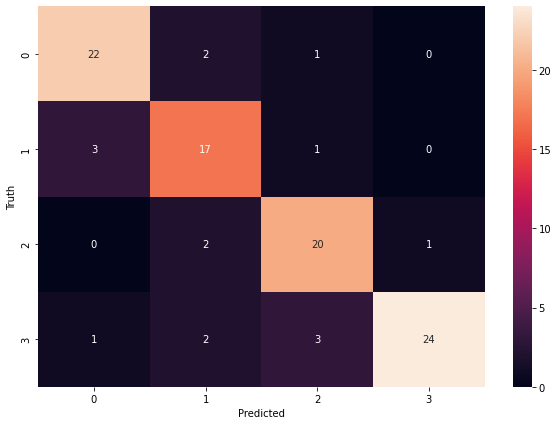

In [234]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c_matrix, annot=True)
plt.xlabel ('Predicted')
plt.ylabel('Truth')

In [235]:
class_dict

{'barack': 0, 'robert': 1, 'tamana': 2, 'messi ': 3}

Diagnols -> True Predictions....

## Saving the Trained Model

In [236]:
!pip install joblib 
import joblib
joblib.dump(best_model,'saved_model.pkl')
joblib.dump(best_model,'../backe_end/saved_model.pkl')

['../backe_end/saved_model.pkl']

Save Class_Dictionary

In [237]:
import json
with open("person_class_dict.json","w") as f:
    f.write(json.dumps(class_dict))
with open("../backe_end/person_class_dict.json","w") as f:
    f.write(json.dumps(class_dict))